# Outline

#How to import financial data using Pandas DataReader and yfinance libraries. 
#Understanding financial notations and definitions. 
#Familiarity with the OHLC notation.
#How to plot candlestick charts using mpl_finance library. 
#Importance of financial indicators and implemented some of them using the stockstats library.

In [1]:
pip install pandas-datareader yfinance mpl-finance stockstats


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=49a08c73d412e4527e6228e0ca063ddcf3e17aec3c8567462a26d66f367939d9
  Stored in directory: /Users/user/Library/Caches/pip/wheels/28/79/3c/08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=4346f7a7084d989b665a54307360b883987e24ae1e6f610032d4250643454ae4
  Stored in directory: /Users/user/Library/Caches/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


# import AAPL stock price



In [1]:

import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:

df_aapl = pdr.get_data_yahoo("AAPL", start="2019-01-01", end="2019-09-30")

In [8]:
df_aapl.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,154.340271
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,154.516388
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.125412
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.064575
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,144.741714


A candle in financial market is presented under the format OHLC which stands for "Open-High-Low-Close":

Open: is the price of a stock when a time resolution started (1m, 30m, hourly, daily, etc)
High: is the highest price reached from the beginning to the end of candle.
Low: is the lowest price reached from the beginning to the end of candle.
Close: is the price of a stock when a time resolution finishes.

Two types of trading operations in the financial stock markets:
Long (Buy)
Short (Sell).

In [15]:
pip install mplfinance 


     |████████████████████████████████| 55 kB 1.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


# Plotting Stock Prices


In this section, we will use matplotlib and mpl_finance libraries to plot the stock prices of AAPL. First, we will plot the Open-High-Low-Close prices separately:



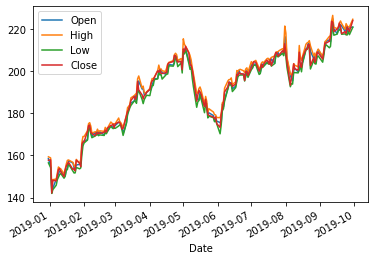

In [49]:
df_aapl[["Open", "High", "Low", "Close"]].plot()
plt.show()

In [19]:
len(df_aapl)

189

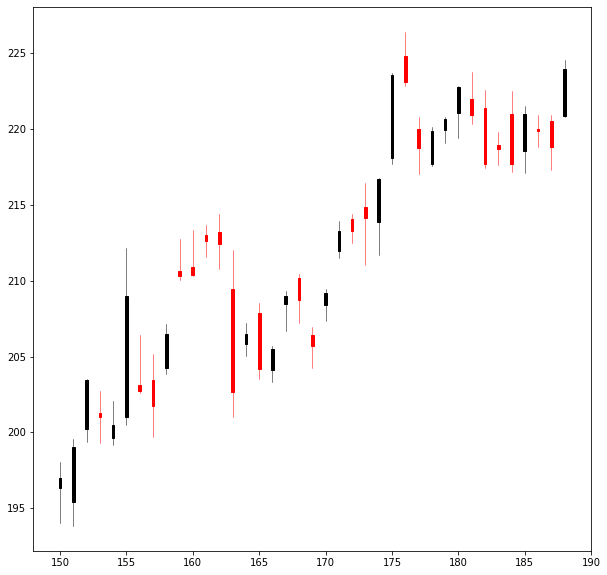

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()

plot_data = []
for i in range(150, len(df_aapl)):
    row = [
        i, 
        df_aapl.Open.iloc[i], 
        df_aapl.High.iloc[i], 
        df_aapl.Low.iloc[i], 
        df_aapl.Close.iloc[i], 
    ]
    plot_data.append(row)
candlestick_ohlc(ax, plot_data)
plt.show()


candle-structure.png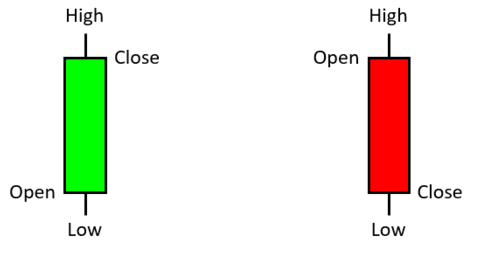


From the stockstats library we will import StockDataFrame, which is a class that receives as an attribute a pandas DataFrame sorted by time and includes the columns Open-Close-High-Low in this order:

In [21]:
from stockstats import StockDataFrame

stocks = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])

# SIMPLE MOVING AVERAGE(SMA)

Simple Moving Average is an indicator which smoothens the stock prices plot, by computing the mean of the prices over a period of time. This will allow us to better visualize the trends directions (up or down)

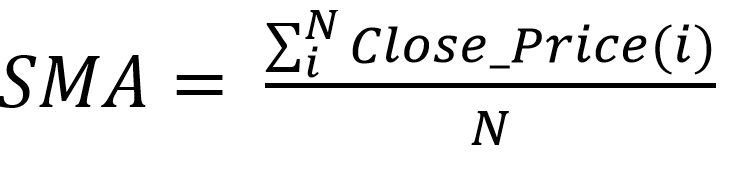


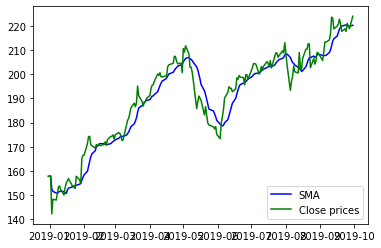

In [38]:
plt.plot(figsize=(10,15))
            
plt.plot(stocks["close_10_sma"], color="b", label="SMA")
plt.plot(df_aapl.Close, color="g", label="Close prices")
plt.legend(loc="lower right")
plt.show()

# Exponential Moving Average (EMA)

Unlike the SMA, which gives equal weights to all prices whether the old or new ones, the Exponential Moving Average emphasizes on the last (most recent) prices by attributing to them a greater weight, this makes the EMA an indicator which detects trends faster than the SMA.

# 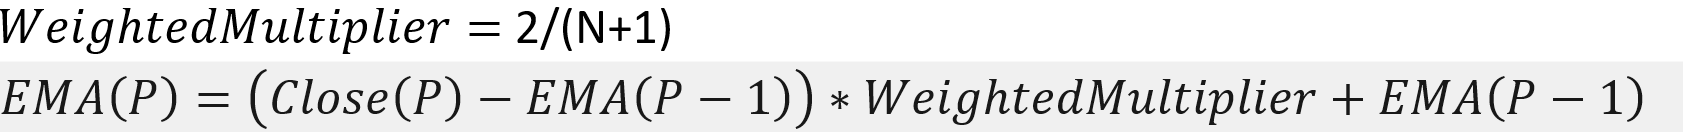

In [45]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

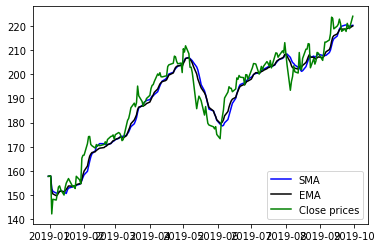

In [47]:

plt.plot(figsize=(100,100))
plt.plot(stocks["close_10_sma"], color="b", label="SMA") # plotting SMA
plt.plot(stocks["close_10_ema"], color="k", label="EMA")#plotting EMA
plt.plot(df_aapl.Close, color="g", label="Close prices") # plotting close prices
plt.legend(loc="lower right")
plt.show()# mouse zooming

In the zoom figure, we can clearly observe that indeed EMA responds faster to the change of trends and gets closer to them.



# Moving Average Convergence/Divergence (MACD)


Moving Average Convergence/Divergence is a trend-following momentum indicator. This Indicator can show changes in the speed of price movement and traders use it to determine the direction of a trend. 

The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. A nine-day EMA of the MACD is called “Signal Line”, which is then plotted with the MACD. 

When MACD crosses below the Signal Line it is an indicator to start doing short (Sell) operations. And when it crosses above it, it is an indicator to start doing long (Buy) operations:

When the MACD line is above the signal line, then the histogram will be positive.



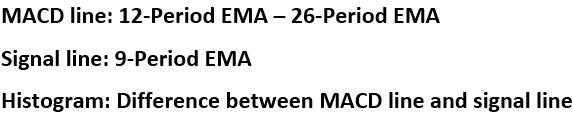

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


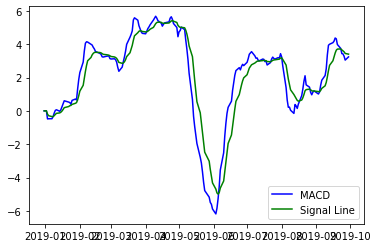

In [48]:
plt.plot(stocks["macd"], color="b", label="MACD")
plt.plot(stocks["macds"], color="g", label="Signal Line")
plt.legend(loc="lower right")
plt.show()